In [1]:
import pandas as pd


In [2]:
edtech=pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/edtech platforms.csv")

In [7]:
edtech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489 entries, 0 to 6488
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_id                  6489 non-null   int64  
 1   student_name                6291 non-null   object 
 2   age                         6489 non-null   int64  
 3   gender                      6489 non-null   object 
 4   country                     6489 non-null   object 
 5   state                       6489 non-null   object 
 6   education_level             6489 non-null   object 
 7   employment_status           6489 non-null   object 
 8   industry                    5340 non-null   object 
 9   years_of_experience         6489 non-null   float64
 10  course_name                 6489 non-null   object 
 11  course_category             6489 non-null   object 
 12  course_fee                  6489 non-null   int64  
 13  engagement_score            6489 

In [9]:
print(edtech.shape)



(6489, 22)


In [ ]:
edtech.describe()



,student_id,age,years_of_experience,course_fee,engagement_score,progress_percent,assignment_submission_rate,attendance_rate,satisfaction_rating,dropout_probability
count,6.489000e+03,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000
mean,1.531393e+07,31.784713,1.614363,1869.926029,0.602432,25.153336,0.506315,0.702521,2.513330,0.435525
std,8.016248e+07,5.690977,2.853223,452.255541,0.478856,32.792679,0.291018,0.174035,1.709979,0.140452
min,0.000000e+00,18.000000,0.000000,1150.000000,0.010000,0.000000,0.000000,0.400000,0.000000,0.010000
25%,3.933000e+03,32.000000,0.000000,1500.000000,0.280000,0.000000,0.250000,0.550000,1.000000,0.330000
50%,4.104300e+04,32.000000,0.000000,1750.000000,0.550000,0.000000,0.510000,0.710000,3.000000,0.440000
75%,9.830530e+05,32.000000,2.300000,2250.000000,0.800000,50.000000,0.760000,0.850000,4.000000,0.540000
max,2.147484e+09,45.000000,10.000000,2800.000000,2.210000,100.000000,1.000000,1.000000,5.000000,0.850000


In [11]:
edtech.isnull().sum()


student_id                       0
student_name                   198
age                              0
gender                           0
country                          0
state                            0
education_level                  0
employment_status                0
industry                      1149
years_of_experience              0
course_name                      0
course_category                  0
course_fee                       0
engagement_score                 0
progress_percent                 0
enrollment_date                  0
last_active_date                 0
assignment_submission_rate       0
attendance_rate                  0
satisfaction_rating              0
dropout_probability              0
dropout_status                   0
dtype: int64

In [ ]:
#Find out which features (like attendance_rate, progress_percent, etc.) correlate most with dropout_probability.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

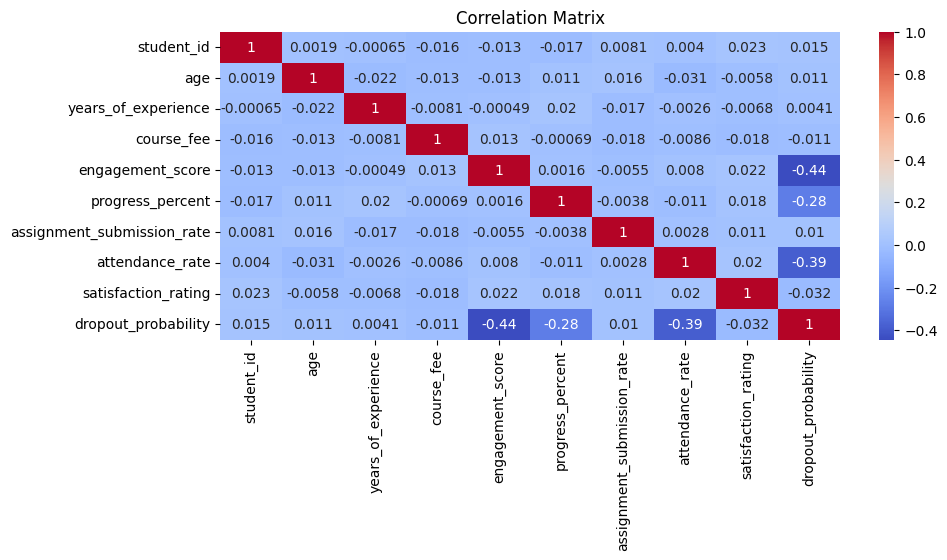

In [20]:
plt.figure(figsize=(10, 4))
sns.heatmap(edtech.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Visual Exploratory Analysis




Text(0.5, 1.0, 'Dropout Status by Education Level')

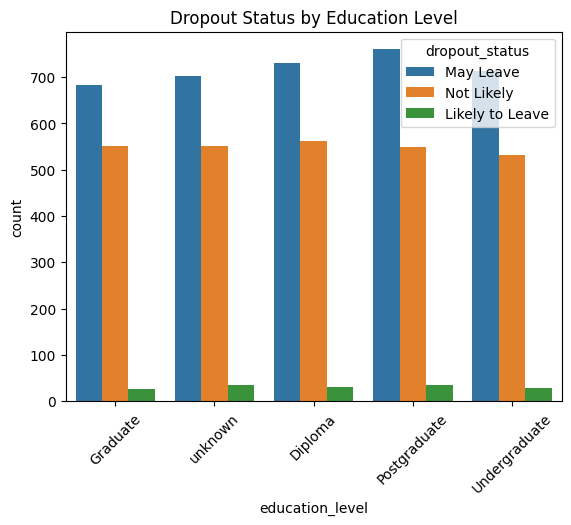

In [21]:
#A. Dropout by Education Level

sns.countplot(x="education_level",hue="dropout_status",data=edtech)
plt.xticks(rotation=45)
plt.title("Dropout Status by Education Level")

Text(0.5, 1.0, 'Engagement Score vs Dropout Status')

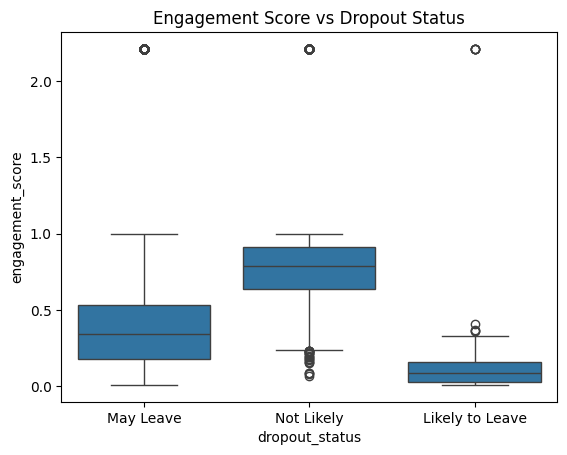

In [22]:
# B. Engagement vs Dropout

sns.boxplot(x="dropout_status",y="engagement_score",data=edtech)
plt.title("Engagement Score vs Dropout Status")

Text(0.5, 1.0, 'Dropout by Progress Buckets')

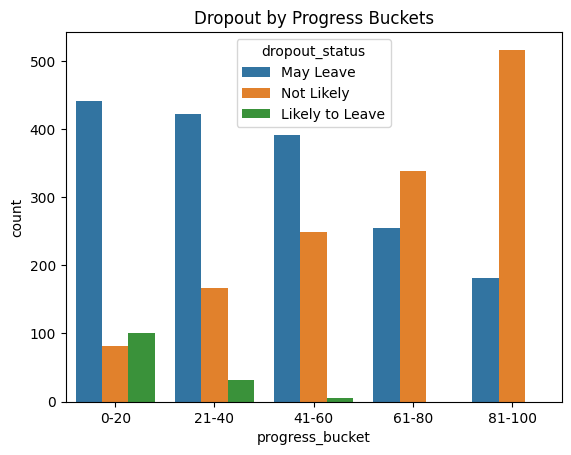

In [ ]:
#C. Progress Percent Buckets
edtech['progress_bucket'] = pd.cut(edtech['progress_percent'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20','21-40','41-60','61-80','81-100'])
sns.countplot(x='progress_bucket', hue='dropout_status', data=edtech)
plt.title("Dropout by Progress Buckets")


In [24]:
# Predictive Modeling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [35]:
# Define features and target
features = ['attendance_rate', 'engagement_score', 'assignment_submission_rate', 'progress_percent']
X = edtech[features]
Y= edtech['dropout_status'].apply(lambda x: 1 if x in ['Likely to Leave', 'May Leave'] else 0)


In [36]:
# Train-test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [37]:
# Model training
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [38]:
print(edtech['dropout_status'].value_counts())
print(Y.value_counts())


dropout_status
May Leave          3587
Not Likely         2745
Likely to Leave     157
Name: count, dtype: int64
dropout_status
1    3744
0    2745
Name: count, dtype: int64


In [39]:
# Evaluation
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       540
           1       0.78      0.88      0.83       758

    accuracy                           0.79      1298
   macro avg       0.79      0.77      0.78      1298
weighted avg       0.79      0.79      0.78      1298

